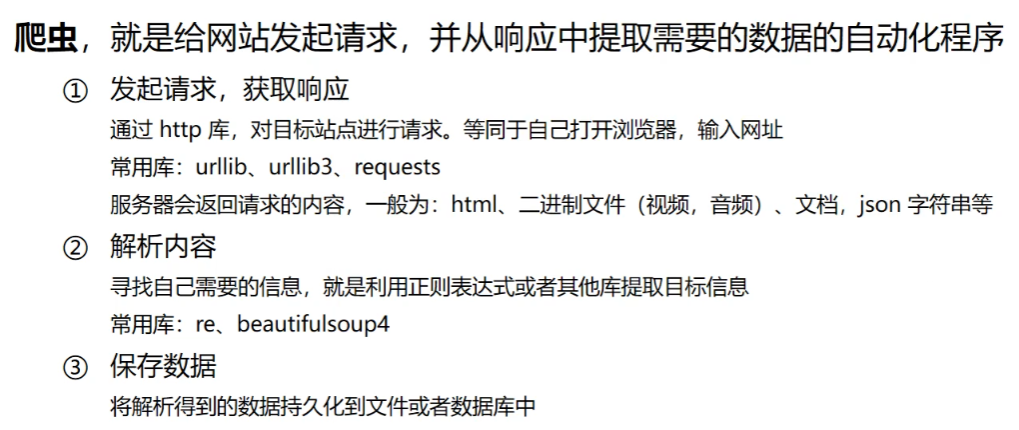

## 使用urllib发送请求

- request.urlopen()

In [1]:
from urllib import request

In [2]:
url = "http://www.baidu.com"
res = request.urlopen(url)

In [3]:
print(res.info())  # 响应头

Bdpagetype: 1
Bdqid: 0xdcef340300048659
Cache-Control: private
Content-Type: text/html;charset=utf-8
Date: Mon, 06 Jun 2022 05:19:22 GMT
Expires: Mon, 06 Jun 2022 05:19:22 GMT
P3p: CP=" OTI DSP COR IVA OUR IND COM "
P3p: CP=" OTI DSP COR IVA OUR IND COM "
Server: BWS/1.1
Set-Cookie: BAIDUID=7DD7A48BB37571733130022F0A9F2D86:FG=1; expires=Thu, 31-Dec-37 23:55:55 GMT; max-age=2147483647; path=/; domain=.baidu.com
Set-Cookie: BIDUPSID=7DD7A48BB37571733130022F0A9F2D86; expires=Thu, 31-Dec-37 23:55:55 GMT; max-age=2147483647; path=/; domain=.baidu.com
Set-Cookie: PSTM=1654492762; expires=Thu, 31-Dec-37 23:55:55 GMT; max-age=2147483647; path=/; domain=.baidu.com
Set-Cookie: BAIDUID=7DD7A48BB3757173F11544378BF8C1D6:FG=1; max-age=31536000; expires=Tue, 06-Jun-23 05:19:22 GMT; domain=.baidu.com; path=/; version=1; comment=bd
Set-Cookie: BDSVRTM=7; path=/
Set-Cookie: BD_HOME=1; path=/
Set-Cookie: H_PS_PSSID=36543_36454_31253_34813_36422_36166_36487_36518_36074_36519_36346_26350_36299_36468_36312;

In [4]:
print(res.getcode())  # 状态码

200


In [5]:
print(res.geturl())  # 响应地址，可能出现url转发

http://www.baidu.com


In [7]:
html = res.read()  # 网页内容  十六进制
html = html.decode('utf-8')   # 解码操作
print(html)

**处理返爬措施**

- 请求头中添加User-Agent

In [8]:
url = "https://www.dianping.com/"

# 添加User-Agent 反爬措施
header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36"
}

req  = request.Request(url, headers=header)
res = request.urlopen(req)
print(res.info())

Date: Mon, 06 Jun 2022 05:36:05 GMT
Content-Type: text/html;charset=UTF-8
Transfer-Encoding: chunked
Connection: close
Vary: Accept-Encoding
Vary: User-Agent, Accept-Encoding
M-TraceId: 5282643385333598457
M-TraceId: 6565035752004800837
Set-Cookie: fspop=test; Domain=.dianping.com; Expires=Mon, 13-Jun-2022 05:36:05 GMT; Path=/
Set-Cookie: cy=268; Domain=.dianping.com; Expires=Thu, 07-Jul-2022 05:36:05 GMT; Path=/
Set-Cookie: cye=qujing; Domain=.dianping.com; Expires=Thu, 07-Jul-2022 05:36:05 GMT; Path=/
Content-Language: en-US
Pragma: no-cache
Cache-Control: no-cache
Server: DPweb




## 使用requests发送请求

- requests.get()
- requests.post()

In [1]:
import requests

In [19]:
url = "http://www.baidu.com"

res = requests.get(url)  # 发送请求

In [11]:
print(res.encoding) # 查看编码

ISO-8859-1


In [12]:
print(res.status_code)  # 查看状态码

200


In [20]:
print(res.headers)  # 请求头信息

{'Connection': 'close', 'Transfer-Encoding': 'chunked', 'Cache-Control': 'private, no-cache, no-store, proxy-revalidate, no-transform', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html', 'Date': 'Mon, 06 Jun 2022 05:42:51 GMT', 'Last-Modified': 'Mon, 23 Jan 2017 13:27:43 GMT', 'Pragma': 'no-cache', 'Server': 'bfe/1.0.8.18', 'Set-Cookie': 'BDORZ=27315; max-age=86400; domain=.baidu.com; path=/'}


In [17]:
html = res.text
# print(html)
# 解码
res.encoding = 'utf-8'
html = res.text
# print(html)

In [3]:
# 添加header反爬
url = "https://www.dianping.com"

# 添加User-Agent 反爬措施
header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36"
}

res = requests.get(url,headers=header)  # 发送请求

#  Max retries exceeded  -- 不能使用代理，否则出错！！！！
print(res.status_code)  # 查看状态码

200


## 使用beautifulsoup4解析内容

- BeautifulSoup(html)

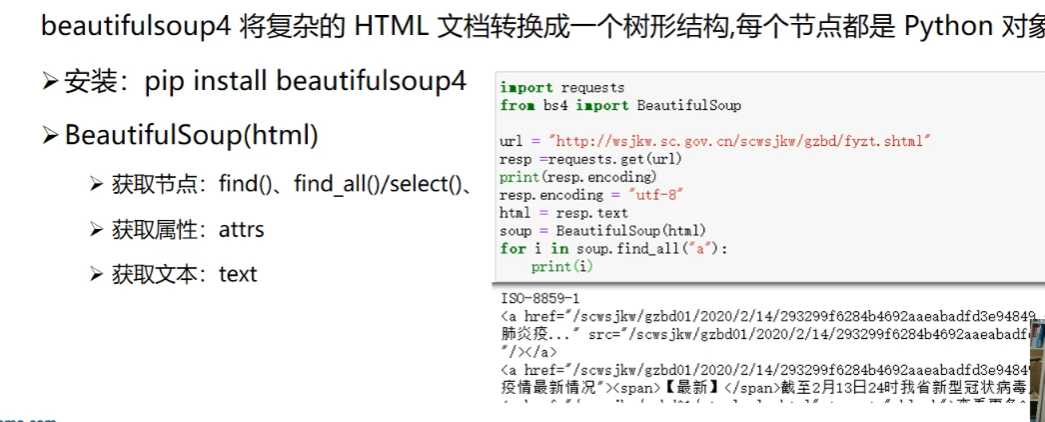

In [5]:
import requests

from bs4 import BeautifulSoup

In [6]:
url = "http://wsjkw.sc.gov.cn/scwsjkw/gzbd/fyzt.shtml"

res = requests.get(url)

res.headers

{'Server': 'nginx', 'Date': 'Mon, 06 Jun 2022 06:01:21 GMT', 'Content-Type': 'text/html', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Expires': 'Mon, 06 Jun 2022 06:06:21 GMT', 'Cache-Control': 'max-age=300', 'Content-Encoding': 'gzip'}

In [9]:
res.encoding = 'utf-8'
html = res.text
# print(html)

In [10]:
soup = BeautifulSoup(html)
soup.find('h2').text

'疫情通报'

In [15]:
# 获取a标签
a =  soup.find('a')
print(a)

<a href="/scwsjkw/gzbd01/2022/6/6/e2888c2ee7db4fb19b71e6912a6939a2.shtml" target="_blank"><img alt="四川省新型冠状病毒肺炎疫情最新情况（..." src="/scwsjkw/gzbd01/2022/6/6/e2888c2ee7db4fb19b71e6912a6939a2/images/6dbbb8c0913d4efea58ceec0c402619f.jpg
"/></a>


In [16]:
# 获取a标签所有属性
print(a.attrs)

{'target': '_blank', 'href': '/scwsjkw/gzbd01/2022/6/6/e2888c2ee7db4fb19b71e6912a6939a2.shtml'}


In [17]:
# 获取herf
print(a.attrs['href'])

/scwsjkw/gzbd01/2022/6/6/e2888c2ee7db4fb19b71e6912a6939a2.shtml


In [19]:
url_new = "http://wsjkw.sc.gov.cn" + a.attrs['href']
print(url_new)

http://wsjkw.sc.gov.cn/scwsjkw/gzbd01/2022/6/6/e2888c2ee7db4fb19b71e6912a6939a2.shtml


In [20]:
resp = requests.get(url_new)

print(resp.status_code)

200


In [42]:
resp.encoding = 'utf=8'
html = resp.text
# print(html)
soup = BeautifulSoup(html)
context = soup.find_all('p')[1]

print(type(context))
print(context)

<class 'bs4.element.Tag'>
<p><span style="font-size: 12pt;">    6月5日0时至24时，四川无新增本土确诊病例，新增本土无症状感染者5例（成都3例，广元2例），无新增境外输入确诊病例，新增境外输入无症状感染者15例（在成都），新增治愈出院病例6例，无新增疑似病例，无新增死亡病例 。
</span><br/>
<span style="font-size: 12pt;">    截至6月5日24时，全省183个县（市、区）全部为低风险地区。
</span><br/>
<span style="font-size: 12pt;">    具体情况如下：
</span><br/>
<span style="font-size: 12pt;">    新增本土无症状感染者5例（成都3例，广元2例）：
</span><br/>
<span style="font-size: 12pt;">    3例为省外返蓉人员；
</span><br/>
<span style="font-size: 12pt;">    2例为省外返广元人员；
</span><br/>
<span style="font-size: 12pt;">    均在闭环集中隔离管控中发现，6月5日诊断为无症状感染者。
</span><br/>
<span style="font-size: 12pt;">    新增境外输入无症状感染者15例（在成都）：
</span><br/>
<span style="font-size: 12pt;">    1例为5月12日自韩国抵达山东，5月28日解除集中隔离后乘机抵蓉进行隔离；
</span><br/>
<span style="font-size: 12pt;">    2例为5月26日自加拿大乘机抵蓉进行隔离；
</span><br/>
<span style="font-size: 12pt;">    4例为5月29日自中国香港乘机抵蓉进行隔离；
</span><br/>
<span style="font-size: 12pt;">    5例为6月1日自新加坡乘机抵蓉进行隔离；
</span><br/>
<span style="font-size: 12pt;">    1例为6月1日自

## 使用re解析模块

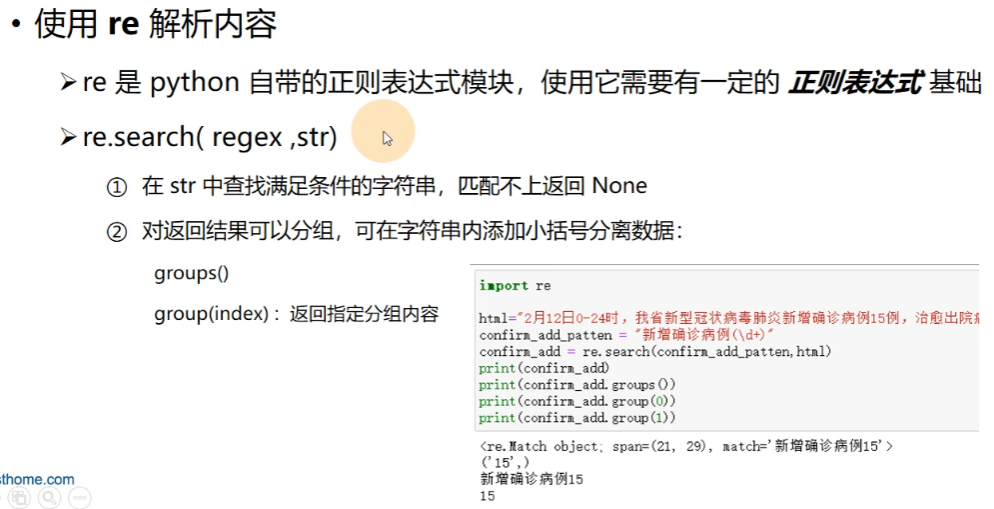

In [55]:
import re

text = context.text

pattern = "新增本土无症状感染者(\d+)例"

res = re.search(pattern, text)

print(res)

<_sre.SRE_Match object; span=(27, 39), match='新增本土无症状感染者5例'>


In [56]:
print(res.group()) # 所有值
print(res.group(0)) # 第一个参数 
print(res.group(1)) # 第2个参数

新增本土无症状感染者5例
新增本土无症状感染者5例
5


In [60]:
# 新增本土无症状感染者5例（成都3例，广元2例），无新增境外输入确诊病例，
# 新增境外输入无症状感染者15例（在成都），新增治愈出院病例6例

# .* 任意，越多越好   .*? 非贪婪匹配
pattern1 = "本土无症状感染者(\d+).*?新增境外输入无症状感染者(\d+).*?新增治愈出院病例(\d+)例"

res = re.search(pattern1, text)

print(res)


<_sre.SRE_Match object; span=(29, 94), match='本土无症状感染者5例（成都3例，广元2例），无新增境外输入确诊病例，新增境外输入无症状感染者15例>


In [61]:
print(res.groups())

('5', '15', '6')
